In [3]:
import pandas as pd
from collections import Counter

In [4]:
# Search results from last 12 months (from July 2024), 
# gaza-pot.csv inlcude posts where the page admin is in Palestine Occupied Territories
# gaza-us inlcude posts where the page admin is in USA
# Page Categories filter: Media News Company, Newsagent Newsstand, News Personality, News Site, Newspaper, 
# Political Candidate, Political Party, Politician, Political Organisation 


db1 = pd.read_csv('gaza-pot.csv')
db2 = pd.read_csv('gaza-us.csv')

In [5]:
# Convert object-type columns to string, except integer columns
for col in db1.columns:
    if db1[col].dtype == 'object':
        db1[col] = db1[col].astype(str)

for col in db2.columns:
    if db2[col].dtype == 'object':
        db2[col] = db2[col].astype(str)

In [6]:
# Define the keyword to search for
# Users can use different keywords here just run code without any chances for new output
keyword = 'genocide'

In [7]:
# Function to find occurrences of keywords in the "Message" column
def find_keyword_occurrences(df, keyword):
    occurrences = df[df['Message'].str.contains(keyword, case=False)].index.tolist()
    return occurrences

# Function to find the page with the most mentions of a keyword
def find_top_page(df, keyword):
    occurrences = find_keyword_occurrences(df, keyword)
    page_counts = Counter(df.loc[occurrences, 'Page Name'])
    return page_counts.most_common(1)[0][0]

# Function to find the top 5 most shared URLs
def find_top_shared_urls(df):
    url_shares = df.groupby('URL')['Shares'].sum().sort_values(ascending=False)
    return url_shares.head(5).index.tolist()

In [8]:
# Find keyword occurrences and top page for Database 1
db1_occurrences = find_keyword_occurrences(db1, keyword)
db1_top_page = find_top_page(db1, keyword)
print(f"Keyword occurrences in Database 1: {len(db1_occurrences)}")
print(f"Page with most mentions in Database 1: {db1_top_page}")

# Find keyword occurrences and top page for Database 2
db2_occurrences = find_keyword_occurrences(db2, keyword)
db2_top_page = find_top_page(db2, keyword)
print(f"Keyword occurrences in Database 2: {len(db2_occurrences)}")
print(f"Page with most mentions in Database 2: {db2_top_page}")

# Find top 5 most shared URLs for each database
db1_top_shared_urls = find_top_shared_urls(db1)
db2_top_shared_urls = find_top_shared_urls(db2)

print("\nTop 5 most shared URLs:")
print("Database 1:")
for url in db1_top_shared_urls:
    print(url)

print("\nDatabase 2:")
for url in db2_top_shared_urls:
    print(url)

Keyword occurrences in Database 1: 2203
Page with most mentions in Database 1: Palestine International Broadcast
Keyword occurrences in Database 2: 382
Page with most mentions in Database 2: AJ+

Top 5 most shared URLs:
Database 1:
https://www.facebook.com/100069351265250/posts/652534593734910
https://www.facebook.com/100069351265250/posts/641634944824875
https://www.facebook.com/100063488323012/posts/858420086284261
https://www.facebook.com/100069351265250/posts/641570688164634
https://www.facebook.com/100069351265250/posts/651321983856171

Database 2:
https://www.facebook.com/100064529598989/posts/712940567533590
https://www.facebook.com/100064529598989/posts/714530150707965
https://www.facebook.com/100064529598989/posts/781787500648896
https://www.facebook.com/100064529598989/posts/714437300717250
https://www.facebook.com/100064529598989/posts/709291277898519


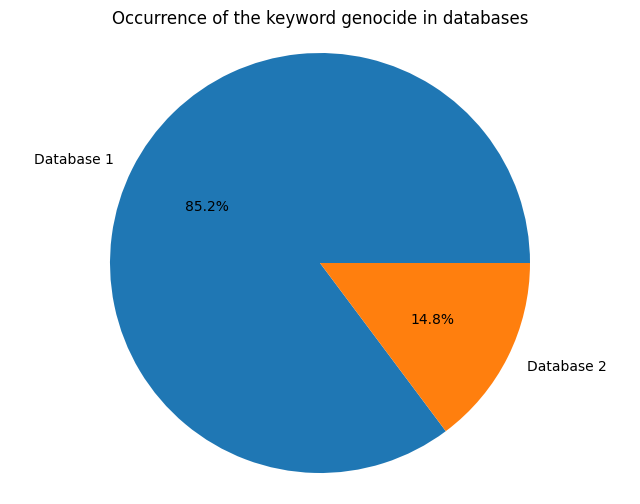

In [9]:
import matplotlib.pyplot as plt

# Assuming you have the keyword occurrences data from the previous code
labels = ['Database 1', 'Database 2']
sizes = [len(db1_occurrences), len(db2_occurrences)]

fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures that pie is circular.
ax.set_title(f'Occurrence of the keyword {keyword} in databases')
plt.show()

In [10]:
# Export rows containing the keyword to CSV
def export_keyword_rows(df, keyword, filename):
    occurrences = find_keyword_occurrences(df, keyword)
    keyword_rows = df.loc[occurrences, ['Page Name', 'Post Created', 'Shares', 'Message', 'URL']]
    keyword_rows.to_csv(filename, index=False)

export_keyword_rows(db1, keyword, f'db1_rows_with_{keyword}.csv')
export_keyword_rows(db2, keyword, f'db2_rows_with_{keyword}.csv')